<a href="https://colab.research.google.com/github/guntsvzz/CP_Project/blob/main/EEG_Stress_CNN_Cleaned.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade --no-cache-dir gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0


In [12]:
!unzip '/content/clean_exp16 2.zip'
!mv '/content/clean_exp16' 'Cleaned_signal'

Archive:  /content/clean_exp16 2.zip
   creating: clean_exp16/
  inflating: __MACOSX/._clean_exp16  
  inflating: clean_exp16/PSS10 - Sheet1.csv  
  inflating: __MACOSX/clean_exp16/._PSS10 - Sheet1.csv  
  inflating: clean_exp16/clean_exp8.csv  
  inflating: __MACOSX/clean_exp16/._clean_exp8.csv  
  inflating: clean_exp16/clean_exp9.csv  
  inflating: __MACOSX/clean_exp16/._clean_exp9.csv  
  inflating: clean_exp16/clean_exp7.csv  
  inflating: __MACOSX/clean_exp16/._clean_exp7.csv  
  inflating: clean_exp16/clean_exp15.csv  
  inflating: __MACOSX/clean_exp16/._clean_exp15.csv  
  inflating: clean_exp16/clean_exp14.csv  
  inflating: __MACOSX/clean_exp16/._clean_exp14.csv  
  inflating: clean_exp16/clean_exp6.csv  
  inflating: __MACOSX/clean_exp16/._clean_exp6.csv  
  inflating: clean_exp16/clean_exp4.csv  
  inflating: __MACOSX/clean_exp16/._clean_exp4.csv  
  inflating: clean_exp16/clean_exp16.csv  
  inflating: __MACOSX/clean_exp16/._clean_exp16.csv  
  inflating: clean_exp16/clean

In [13]:
!gdown --id 1BE2-swwhyXr2VfJ-QyKNSBbyGfqJvHGs

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:125: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1BE2-swwhyXr2VfJ-QyKNSBbyGfqJvHGs
To: /content/clean_exp16 2.zip
100% 121M/121M [00:00<00:00, 266MB/s]


In [14]:
pip install mne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
pip install components

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
import pickle
import numpy as np
import os
import mne
import pandas as pd
pickle.format_version

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms  
from torch.utils.data import DataLoader, Dataset  
from torch.utils.data import TensorDataset
from torch.autograd import Variable

import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# setting seed so that splitting process and training process can be reproduce
torch.manual_seed(1)

# ETL

In [17]:
import os
main_path = os.getcwd()
filename = os.listdir(main_path + '/Cleaned_signal/')

In [18]:
filename = ['clean_exp1.csv',
 'clean_exp2.csv',
 'clean_exp3.csv',
 'clean_exp4.csv',
 'clean_exp5.csv',
 'clean_exp6.csv',
 'clean_exp7.csv',
 'clean_exp8.csv',
 'clean_exp9.csv',
 'clean_exp10.csv',
 'clean_exp11.csv',
 'clean_exp12.csv',
 'clean_exp13.csv',
 'clean_exp14.csv',
 'clean_exp15.csv',
 'clean_exp16.csv',
 'clean_exp17.csv']

In [19]:
os.getcwd()

'/content'

In [20]:
all_file_path = main_path + '/Cleaned_signal/'
X_list = list()
for file in filename:
    file_path = all_file_path + file
    df = pd.read_csv(file_path, index_col=None)
    df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
    X_list.append(df)  

In [21]:
df.head()

,Fp1,Fp2,F7,F3,F4,F8,T3,C3,C4,T4,T5,P3,P4,T6,O1,O2
0,3.388132e-21,1.312901e-19,-9.080193e-19,8.453389e-19,-1.035074e-18,5.302426e-18,-2.879912e-20,1.973587e-18,-1.770299e-18,2.638719e-18,-7.462360e-19,2.486042e-19,-2.623685e-19,-1.321371e-18,-2.126053e-19,-7.919758e-19
1,4.240123e-06,-1.098127e-03,9.504785e-06,-7.301414e-04,-9.864431e-04,5.528234e-06,4.397685e-06,-3.200624e-05,-1.489707e-05,-9.424304e-06,-1.179442e-06,-3.882617e-06,-1.544578e-04,3.472641e-04,-8.418374e-06,-7.045003e-05
2,4.531352e-06,-2.151353e-04,5.921683e-06,-1.464024e-04,-1.963873e-04,7.661865e-06,7.361615e-06,-4.243603e-06,-4.617989e-06,2.459634e-06,2.879465e-06,2.427743e-06,-2.532974e-05,7.922094e-05,-6.490459e-06,-1.263134e-05
3,3.763741e-06,-5.832528e-04,4.345541e-06,-3.864017e-04,-5.199725e-04,4.296499e-06,6.737737e-06,-1.258225e-05,-1.224808e-05,-4.653922e-06,4.127254e-06,1.146176e-06,-7.805786e-05,2.117792e-04,-7.120499e-06,-3.545076e-05
4,-2.243297e-06,-6.780617e-04,1.494894e-06,-4.541781e-04,-6.006397e-04,-1.012771e-06,3.279630e-06,-1.230263e-05,-1.609016e-05,-6.882220e-06,2.642719e-06,-5.242474e-07,-9.300509e-05,2.342439e-04,-7.541476e-06,-4.271908e-05


In [22]:
X = np.array(X_list)
X.shape

(17, 45000, 16)

In [23]:
# Reshape
X = np.transpose(X, (0, 2, 1))
X.shape

(17, 16, 45000)

In [24]:
y_path = '/content/Cleaned_signal/PSS10 - Sheet1.csv'
df = pd.read_csv(y_path)
y = np.array(df['label'])
y

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1])

# Split Data

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=999)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(13, 16, 45000) (4, 16, 45000) (13,) (4,)


In [26]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, stratify=y_train, random_state=999)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(11, 16, 45000) (2, 16, 45000) (11,) (2,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

#scale transform each channel independently
scalers = {}
for i in range(X_train.shape[2]):
    scalers[i] = MinMaxScaler(feature_range=(-1, 1))
    X_train[:, :, i] = scalers[i].fit_transform(X_train[:, :, i]) 

for i in range(X_val.shape[2]):
    X_val[:, :, i]   = scalers[i].transform(X_val[:, :, i])     
    
for i in range(X_test.shape[2]):
    X_test[:, :, i]  = scalers[i].transform(X_test[:, :, i]) 

In [ ]:
print(X_train.mean(), X_val.mean(), X_test.mean())
print(X_train.min(), X_val.min(), X_test.min())
print(X_train.max(), X_val.max(), X_test.max())

0.004399392956334892 0.0035408048977216095 0.0023469181998402038
-1.0 -62.05057873054599 -514.3939541581051
1.0000000000000004 59.31236061071043 474.60317083503674


# Define Batch size and train,test, val loader

In [27]:
X_train_tensor = torch.tensor(X_train).to(torch.float32)
y_train_tensor = torch.tensor(y_train).to(torch.float32)
X_val_tensor = torch.tensor(X_val).to(torch.float32)
y_val_tensor = torch.tensor(y_val).to(torch.float32)
X_test_tensor = torch.tensor(X_test).to(torch.float32)
y_test_tensor = torch.tensor(y_test).to(torch.float32)

# Cast data to dataloader for more convenience
training_set = TensorDataset(X_train_tensor, y_train_tensor)
testing_set = TensorDataset(X_test_tensor, y_test_tensor)
validation_set = TensorDataset(X_val_tensor, y_val_tensor)

train_batch_size = 3
val_batch_size = len(validation_set)
test_batch_size = len(testing_set)

train_loader = DataLoader(training_set, train_batch_size, shuffle=True)
val_loader = DataLoader(validation_set, val_batch_size, shuffle=True)
test_loader = DataLoader(testing_set, test_batch_size, shuffle=True)

In [28]:
for data, label in train_loader:
  print(data)
  break

tensor([[[-6.3316e-19, -9.6266e-06, -2.7620e-06,  ..., -6.0799e-06,
          -1.1907e-05,  7.5962e-18],
         [ 1.1867e-18, -5.4538e-06,  7.7322e-06,  ..., -1.2524e-06,
          -9.4936e-06,  3.0154e-19],
         [-1.0283e-18, -9.7752e-06,  3.9215e-06,  ...,  8.3088e-06,
          -1.1180e-05,  5.1152e-18],
         ...,
         [ 1.5162e-18,  7.0610e-04,  1.5630e-04,  ..., -1.0591e-04,
          -4.0342e-04,  4.6773e-18],
         [ 1.3553e-19,  4.0208e-04,  8.8902e-05,  ..., -2.7808e-04,
          -3.1347e-04, -3.9641e-19],
         [-9.1818e-19,  3.9709e-05,  4.6830e-06,  ..., -8.5945e-06,
          -3.6021e-05,  3.0493e-20]],

        [[-1.0020e-18, -1.3430e-04, -4.5626e-05,  ...,  2.1384e-05,
           9.7582e-05,  2.9612e-18],
         [ 1.8544e-18, -1.2890e-04, -4.4444e-05,  ...,  1.8005e-05,
           6.5664e-05,  5.6921e-19],
         [ 3.0646e-18,  3.9933e-04,  7.8426e-05,  ..., -1.9756e-05,
          -1.3132e-04, -7.0473e-19],
         ...,
         [ 1.3801e-18,  4

In [89]:
data.shape

torch.Size([3, 16, 45000])

In [29]:
data.shape

torch.Size([3, 16, 45000])

In [30]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
#lstm_model = nn.LSTM(input_size=45000, hidden_size=500)

# CNN model

In [94]:

class eegConv1d(nn.Module):
    def __init__(self, input_size = 8, out_size=2):
        super().__init__()
        self.c1 = nn.Conv1d(input_size, 50, kernel_size = 3)
        self.c2 = nn.Conv1d(50, 30, kernel_size = 3)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.5)
        self.maxpool1d = nn.MaxPool1d(2,2)
        self.linear = nn.Linear(30 * 22497, out_size) #taking the last hidden state
        
    def forward(self, seq):
        #convo layer 8 -> 50 -> 30
        #seq shape: (11, 50, 45000)
        out = self.c1(seq)
        out = self.relu(out)
        out = self.dropout(out)
        # out shape: (11, 50, 44998)
        out = self.maxpool1d(out)
        # out shape: (11, 50, 22499)
        out = self.c2(out)
        out = self.relu(out)
        # out shape: (11, 30, 22496)
        out = out.reshape(seq.size(0), -1)
        #out shape: (30, 30*22496)
        out = self.linear(out)
        #out shape: (30*22496, 2)
        return out

In [95]:
import time

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [96]:
# torch.manual_seed(999999)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = eegConv1d(input_size=16).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001)

In [101]:
epochs = 200

best_valid_loss = float('inf')
model.train()

train_losses = []
train_accs   = []
valid_losses = []
valid_accs   = []


#print(f"Training {type(model).__name__}")

for i in range(epochs):
    train_total = 0
    train_correct = 0
    val_total   = 0  
    val_correct = 0
    train_acc   = 0
    val_acc     = 0
    
    for X_train, y_train in train_loader:
    
        start_time = time.time()
        
        X_train = X_train.float().to(device)
        y_train = y_train.type(torch.LongTensor).to(device)

        #print(X_train.shape, X_train.dtype)

        yhat_train = model(X_train)
        
        #train acc
        _, predicted = torch.max(yhat_train.data, 1)  #returns max value, indices
        train_total += y_train.size(0)  #keep track of total
        train_correct += (predicted == y_train).sum().item()  #.item() give the raw number
        train_acc = 100 * (train_correct / train_total)
        
        #print(y_train.shape, y_train.dtype)
        
        train_loss = criterion(yhat_train, y_train)
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        end_time = time.time()

            #for plotting
        train_losses.append(train_loss.item())
        train_accs  .append(train_acc)
        valid_losses.append(val_loss.item())
        valid_accs  .append(val_acc)
    

        #val accuracy
        for X_val, y_val in val_loader:
            X_val = X_val.float().to(device)
            y_val = y_val.type(torch.LongTensor).to(device)
            yhat_val  = model(X_val)
            val_loss     = criterion(yhat_val, y_val)
            _, predicted = torch.max(yhat_val.data, 1)  #returns max value, indices
            val_total += y_val.size(0)  #keep track of total
            val_correct += (predicted == y_val).sum().item()  #.item() give the raw number
            val_acc = 100 * (val_correct / val_total)

        #save the best model
        if val_loss < best_valid_loss:
            best_valid_loss = val_loss
            #print("Model:{} saved.".format(type(model).__name__))
            torch.save(model.state_dict(), './models/CNN1D.pt')
            best_model_index = i

        epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    print(f"Epoch: {i:2.0f} | Train acc: {train_acc: 2.2f} | " +
          f"loss: {train_loss:2.5f} | Val acc: {val_acc: 2.2f} | " +
          f"loss: {val_loss:2.5f} | Time: {epoch_mins}m {epoch_secs}s")

Epoch:  0 | Train acc:  45.45 | loss: 0.78322 | Val acc:  50.00 | loss: 0.70713 | Time: 0m 0s
Epoch:  1 | Train acc:  36.36 | loss: 0.93427 | Val acc:  50.00 | loss: 0.70659 | Time: 0m 0s
Epoch:  2 | Train acc:  63.64 | loss: 0.98905 | Val acc:  50.00 | loss: 1.02360 | Time: 0m 0s
Epoch:  3 | Train acc:  63.64 | loss: 1.66127 | Val acc:  50.00 | loss: 0.81438 | Time: 0m 0s
Epoch:  4 | Train acc:  18.18 | loss: 1.07769 | Val acc:  50.00 | loss: 0.73144 | Time: 0m 0s
Epoch:  5 | Train acc:  45.45 | loss: 0.69957 | Val acc:  50.00 | loss: 0.73906 | Time: 0m 0s
Epoch:  6 | Train acc:  63.64 | loss: 1.04702 | Val acc:  50.00 | loss: 1.08076 | Time: 0m 0s
Epoch:  7 | Train acc:  63.64 | loss: 0.97008 | Val acc:  50.00 | loss: 0.86521 | Time: 0m 0s
Epoch:  8 | Train acc:  45.45 | loss: 0.73660 | Val acc:  50.00 | loss: 0.69858 | Time: 0m 0s
Epoch:  9 | Train acc:  36.36 | loss: 0.78500 | Val acc:  50.00 | loss: 0.69178 | Time: 0m 0s
Epoch: 10 | Train acc:  63.64 | loss: 0.77593 | Val acc:  50

In [102]:
y_train.shape

torch.Size([2])

In [103]:
yhat = model(X_test_tensor.float().to(device))
#testloss = criterion(yhat, y_test_tensor.type(torch.LongTensor).to(device))
_, predicted = torch.max(yhat.data, 1)

predicted

tensor([0, 0, 0, 0], device='cuda:0')

Text(0, 0.5, 'loss')

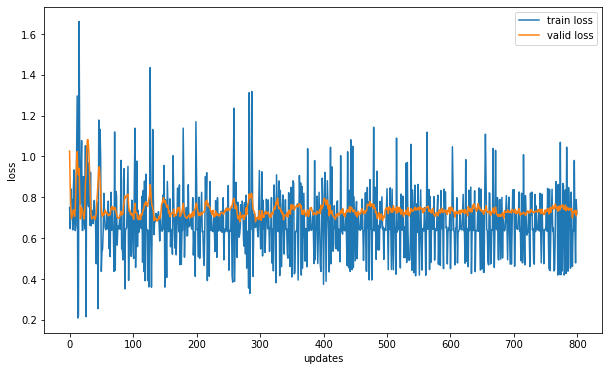

In [104]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 6))
ax  = fig.add_subplot(1, 1, 1)
ax.plot(train_losses, label = 'train loss')
ax.plot(valid_losses, label = 'valid loss')
plt.legend()
ax.set_xlabel('updates')
ax.set_ylabel('loss')

In [105]:
train_losses

[0.7493266463279724,
 0.646449863910675,
 0.8416271805763245,
 0.7832164168357849,
 0.7890098094940186,
 0.6401193737983704,
 0.8384549021720886,
 0.9342679381370544,
 0.6749358177185059,
 0.6367557048797607,
 0.662531316280365,
 0.9890462756156921,
 1.2965061664581299,
 0.20903439819812775,
 0.2211541384458542,
 1.661266803741455,
 0.9855122566223145,
 0.7663605213165283,
 0.9004759192466736,
 1.0776879787445068,
 0.6379075050354004,
 0.6380835175514221,
 0.9018434882164001,
 0.699570894241333,
 0.6447689533233643,
 1.053031325340271,
 0.2154412716627121,
 1.0470185279846191,
 0.7813248038291931,
 0.7713835835456848,
 0.754115104675293,
 0.9700835347175598,
 0.6635251045227051,
 0.9224103093147278,
 0.6596480011940002,
 0.7365994453430176,
 0.7227311730384827,
 0.6713164448738098,
 0.7427668571472168,
 0.7849971055984497,
 0.7148054242134094,
 0.6560793519020081,
 0.4745967388153076,
 0.7759326696395874,
 0.649745762348175,
 0.254809707403183,
 1.178341269493103,
 0.9466420412063599,


In [49]:
y_test

array([1, 0, 0, 1])